In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
#Load the CSV file and get information about the dataset
df = pd.read_csv('../data/obesity.csv')
df.rename(columns={'family_history_with_overweight': 'in_family', 'FAVC':'caloric_food_freq','FCVC':'vegetable_in_meals'
                   ,'NCP':'daily_no_of_meals', 'CAEC':'eating_between_meals','CH2O':'daily_water_intake', 
                   'SMOKE':'smoker','SCC':'monitor_caloric_intake','FAF':'physical_activity_freq',
                   'TUE':'time_on_devices','CALC':'alcohol_intake','MTRANS':'transport_means',
                   'NObeyesdad':'obesity_level'}, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2111 non-null   object 
 1   Age                     2111 non-null   int64  
 2   Height                  2111 non-null   float64
 3   Weight                  2111 non-null   float64
 4   in_family               2111 non-null   object 
 5   caloric_food_freq       2111 non-null   object 
 6   vegetable_in_meals      2111 non-null   float64
 7   daily_no_of_meals       2111 non-null   float64
 8   eating_between_meals    2111 non-null   object 
 9   smoker                  2111 non-null   object 
 10  daily_water_intake      2111 non-null   float64
 11  monitor_caloric_intake  2111 non-null   object 
 12  physical_activity_freq  2111 non-null   float64
 13  time_on_devices         2111 non-null   float64
 14  alcohol_intake          2111 non-null   

In [128]:
#Getting descriptive statistics of numerical data of the dataset
df.describe()

,Age,Height,Weight,vegetable_in_meals,daily_no_of_meals,daily_water_intake,physical_activity_freq,time_on_devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


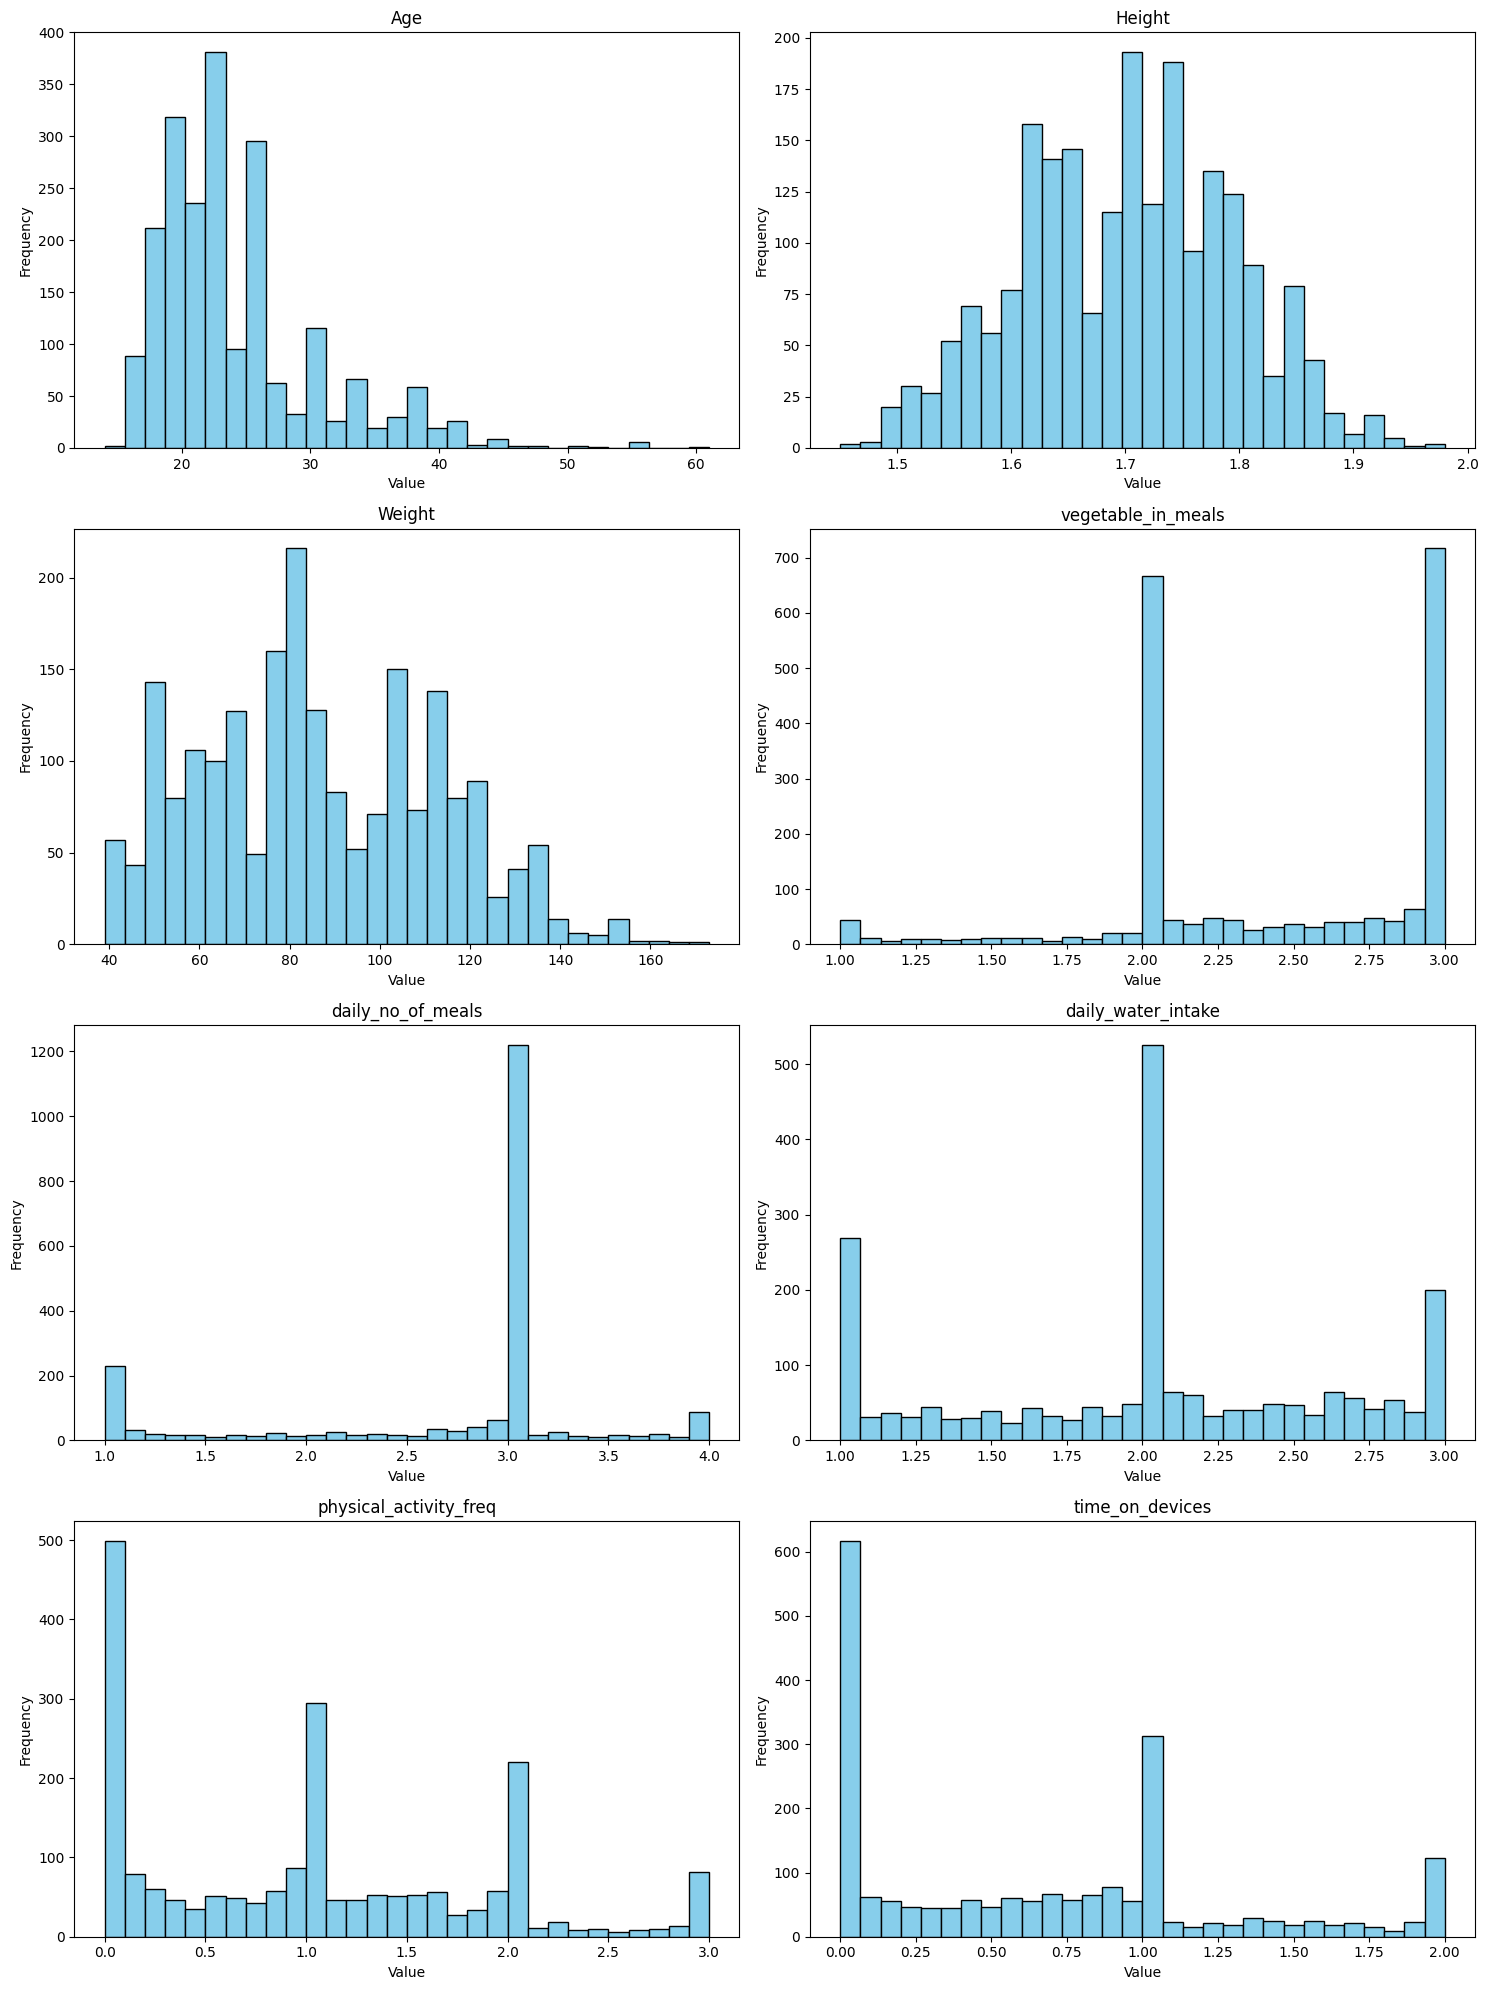

In [129]:
#Visualizations for numerical data
columns = [
    "Age", "Height", "Weight", "vegetable_in_meals",
    "daily_no_of_meals", "daily_water_intake",
    "physical_activity_freq", "time_on_devices"
]
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows × 2 columns = 8 axes
axes = axes.flatten()
for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=30, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [130]:
#Getting descriptive statistics of non-numerical data of the dataset
df.describe(include=['object'])


,Gender,in_family,caloric_food_freq,eating_between_meals,smoker,monitor_caloric_intake,alcohol_intake,transport_means,obesity_level
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [131]:
#A function to plot pie charts for non-categorical data
def plot_pie_chart(proportions, title, labels):
    plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

#Plotting a pie chart with more than 2 categories
def plot_pie_chart_multiple_categories(proportions, title, labels):
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.pie(proportions, autopct='%1.1f%%', startangle=140)
    ax.legend(title=title, labels=labels, loc='upper right')
    ax.set_title(title)
    plt.show()

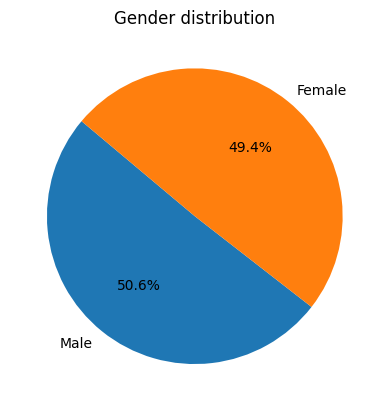

In [132]:

gender_proportion = df['Gender'].value_counts()/df['Gender'].count()
plot_pie_chart(gender_proportion, "Gender distribution", labels=['Male', 'Female'])

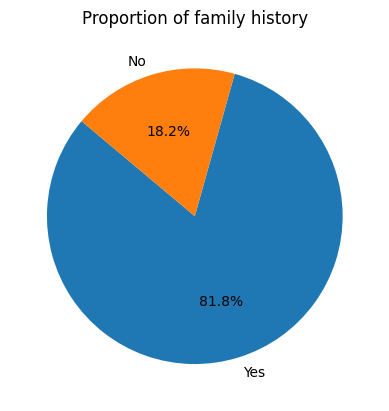

In [133]:
family_proportion = df['in_family'].value_counts()/df['in_family'].count()
plot_pie_chart(family_proportion, "Proportion of family history", labels=['Yes', 'No'])

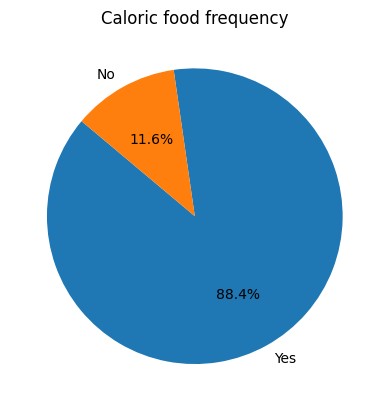

In [134]:
caloric_food_freq_proportion = df['caloric_food_freq'].value_counts()/df['caloric_food_freq'].count()
plot_pie_chart(caloric_food_freq_proportion, "Caloric food frequency", labels=['Yes','No'])

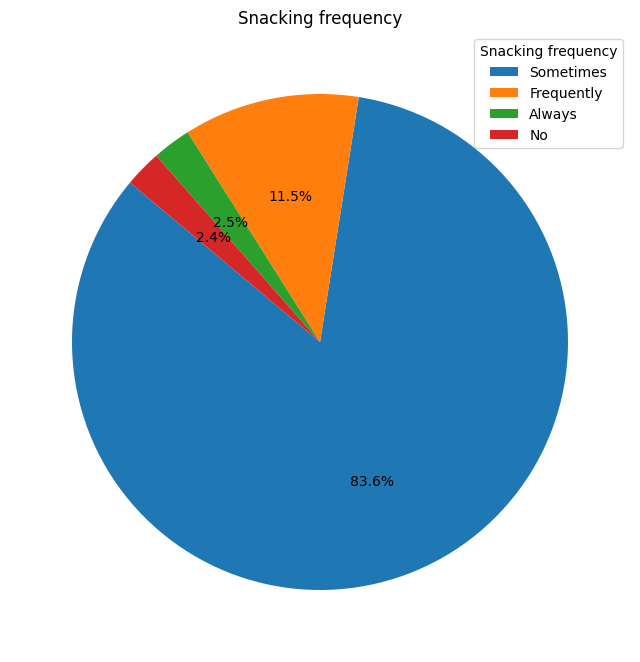

In [135]:
snack_freq_proportion = df['eating_between_meals'].value_counts()/df['eating_between_meals'].count()
plot_pie_chart_multiple_categories(snack_freq_proportion, "Snacking frequency", labels=['Sometimes', 'Frequently', 'Always', 'No'])


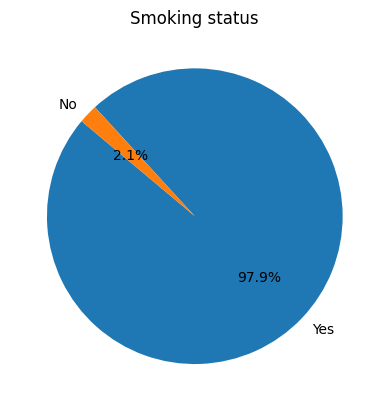

In [136]:
smoking_proportion = df['smoker'].value_counts()/df['smoker'].count()
plot_pie_chart(smoking_proportion, "Smoking status", labels=['Yes', 'No'])

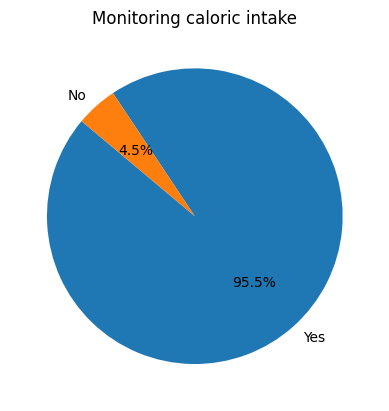

In [137]:
monitor_caloric_intake_proportion = df['monitor_caloric_intake'].value_counts()/df['monitor_caloric_intake'].count()
plot_pie_chart(monitor_caloric_intake_proportion, "Monitoring caloric intake", labels=['Yes', 'No'])

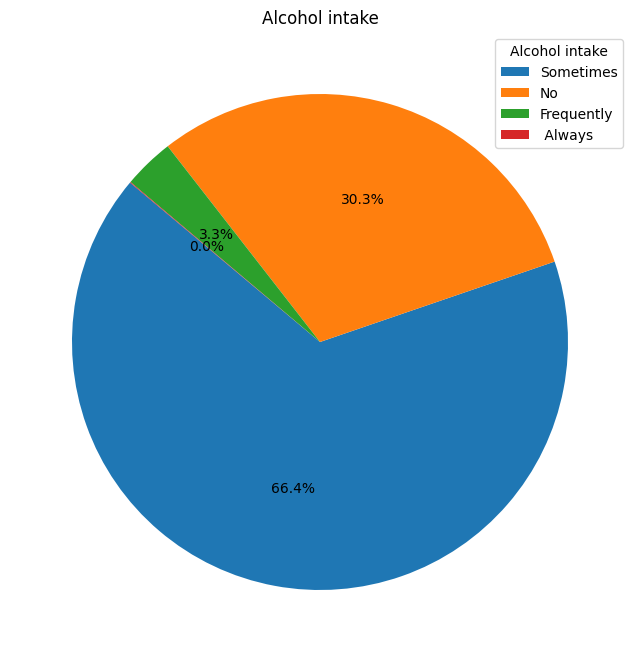

In [138]:
alcohol_intake_proportion = df['alcohol_intake'].value_counts()/df['alcohol_intake'].count()
alcohol_intake_proportion
plot_pie_chart_multiple_categories(alcohol_intake_proportion, "Alcohol intake", labels=['Sometimes', 'No', 'Frequently', ' Always'])

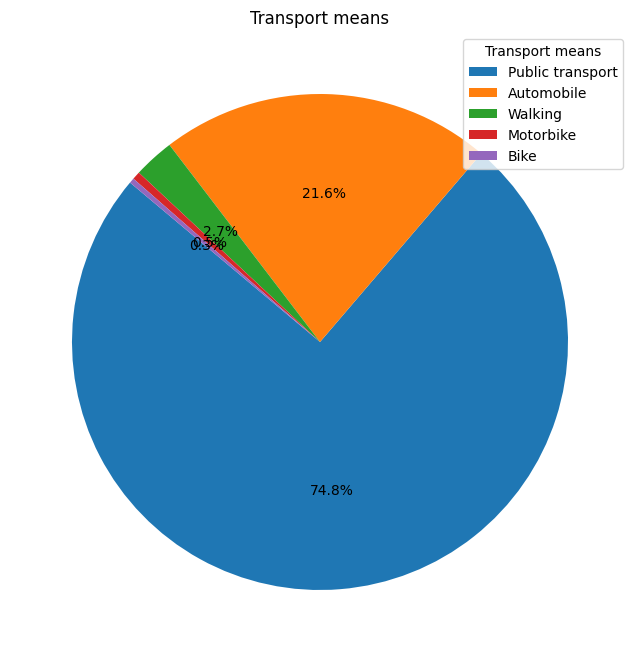

In [139]:
transport_means_proportion = df['transport_means'].value_counts()/df['transport_means'].count()
plot_pie_chart_multiple_categories(transport_means_proportion, "Transport means", labels=['Public transport', 'Automobile','Walking', 'Motorbike', 'Bike'])

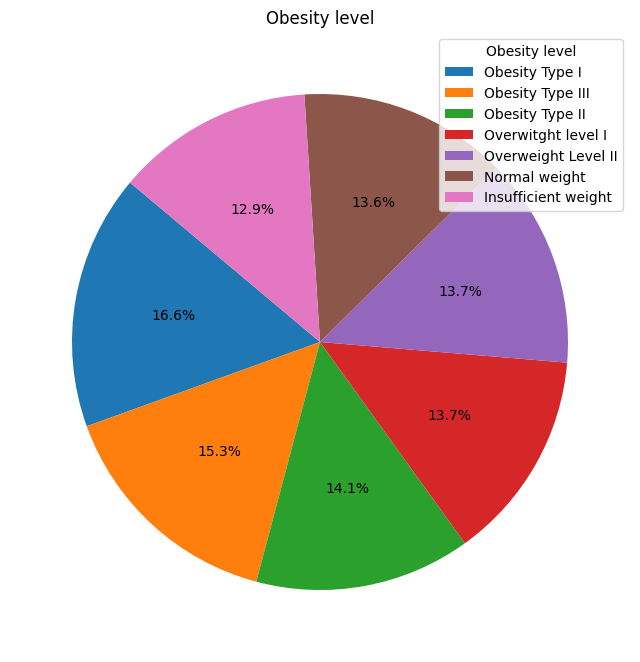

In [140]:
obesity_level_proportion = df['obesity_level'].value_counts()/df['obesity_level'].count()
plot_pie_chart_multiple_categories(obesity_level_proportion, "Obesity level", 
                                   labels=['Obesity Type I', 'Obesity Type III','Obesity Type II', 'Overwitght level I',
                                           'Overweight Level II', 'Normal weight', 'Insufficient weight'])

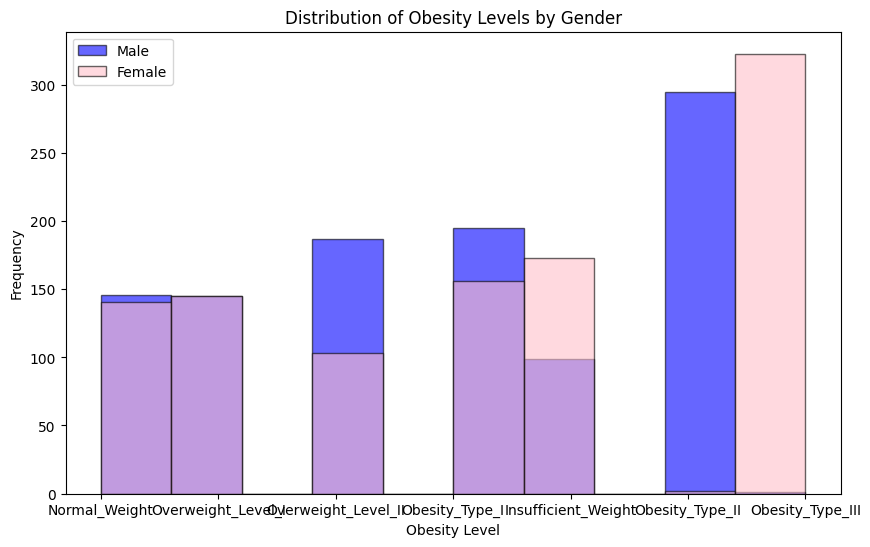

In [147]:
#Plotting the distribution of obesity level by gender
fig, ax = plt.subplots(figsize=(10, 6))

# Split by gender
male_data = df[df['Gender'] == 'Male']['obesity_level']
female_data = df[df['Gender'] == 'Female']['obesity_level']

# Plot histograms
ax.hist(male_data, bins=10, alpha=0.6, color='blue', edgecolor='black', label='Male')
ax.hist(female_data, bins=10, alpha=0.6, color='pink', edgecolor='black', label='Female')

# Labels and title
ax.set_title('Distribution of Obesity Levels by Gender')
ax.set_xlabel('Obesity Level')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()
